## Data Dictionary
---

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|**date**|*datetime*|weather|Date when the records were taken| 
|**daily_rainfall_total**|*float*|weather|Total daily rainfall in mm|
|**highest_30_min_rainfall**|*float*|weather|Highest 30min rainfall in mm|
|**highest_60_min_rainfall**|*float*|weather|Highest 60min rainfall in mm|
|**highest_120_min_rainfall**|*float*|weather|Highest 120min rainfall in mm|
|**mean_temperature**|*float*|weather|Mean temperature in °C|
|**maximum_temperature**|*float*|weather|Maximum temperature in °C|
|**minimum_temperature**|*float*|weather|Minimum temperature in °C|
|**mean_wind_speed**|*float*|weather|Mean wind speed in km/h|
|**max_wind_speed**|*float*|weather|Maximum wind speed in km/h|
|**year**|*float*|weather|Year when the records were taken|
|**region**|*string*|weather|Region where the records were taken|

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [2]:
# Read merged data
merged_data = pd.read_csv('../Data/merged_data.csv')
merged_data.head()

Unnamed: 0        date  daily_rainfall_total  highest_30_min_rainfall  \
0           0  2017-01-01                   3.0                      2.6   
1           1  2017-01-02                  47.2                     32.6   
2           2  2017-01-03                   0.6                      0.6   
3           3  2017-01-04                   2.6                      2.4   
4           4  2017-01-05                   1.2                      0.8   

   highest_60_min_rainfall  highest_120_min_rainfall  mean_temperature  \
0                      2.6                       2.6              26.8   
1                     42.2                      45.2              26.1   
2                      0.6                       0.6              26.3   
3                      2.4                       2.4              26.6   
4                      1.0                       1.2              27.7   

   maximum_temperature  minimum_temperature  mean_wind_speed  max_wind_speed  \
0                 30.0                 24.7             11.2            40.7   
1                 30.5                 24.1              6.1            32.0   
2                 30.6                 24.5              7.6            27.4   
3                 30.2                 23.5              9.0            33.5   
4                 31.4                 24.4              8.6            33.5   

   year     region  daily_rainfall_total_14  highest_30_min_rainfall_14  \
0  2017  Admiralty                      NaN                         NaN   
1  2017  Admiralty                      NaN                         NaN   
2  2017  Admiralty                      NaN                         NaN   
3  2017  Admiralty                      NaN                         NaN   
4  2017  Admiralty                      NaN                         NaN   

   highest_60_min_rainfall_14  highest_120_min_rainfall_14  \
0                         NaN                          NaN   
1                         NaN                          NaN   
2                         NaN                          NaN   
3                         NaN                          NaN   
4                         NaN                          NaN   

   mean_temperature_14  maximum_temperature_14  minimum_temperature_14  \
0                  NaN                     NaN                     NaN   
1                  NaN                     NaN                     NaN   
2                  NaN                     NaN                     NaN   
3                  NaN                     NaN                     NaN   
4                  NaN                     NaN                     NaN   

   mean_wind_speed_14  max_wind_speed_14  aedes  dengue  fever  headache  \
0                 NaN                NaN   10.0    27.0   69.0      70.0   
1                 NaN                NaN    NaN     NaN    NaN       NaN   
2                 NaN                NaN    NaN     NaN    NaN       NaN   
3                 NaN                NaN    NaN     NaN    NaN       NaN   
4                 NaN                NaN    NaN     NaN    NaN       NaN   

   nosebleed  vomit  recent_cases  
0        0.0  100.0           NaN  
1        NaN    NaN           NaN  
2        NaN    NaN           NaN  
3        NaN    NaN           NaN  
4        NaN    NaN           NaN

In [3]:
# Remove Unnamed: 0 column
merged_data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# Display info of the merged data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130926 entries, 0 to 130925
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   date                         130926 non-null  object 
 1   daily_rainfall_total         130926 non-null  float64
 2   highest_30_min_rainfall      130926 non-null  float64
 3   highest_60_min_rainfall      130926 non-null  float64
 4   highest_120_min_rainfall     130926 non-null  float64
 5   mean_temperature             130926 non-null  float64
 6   maximum_temperature          130926 non-null  float64
 7   minimum_temperature          130926 non-null  float64
 8   mean_wind_speed              130926 non-null  float64
 9   max_wind_speed               130926 non-null  float64
 10  year                         130926 non-null  int64  
 11  region                       130926 non-null  object 
 12  daily_rainfall_total_14      130107 non-null  float64
 13 

We have a lot of null values in the recent_cases as well as the google trend. This is mainly due to recent cases is only captured when there is a dengue cluster. There will be no record of dengue cases when there is no dengue cluster.

<AxesSubplot:>

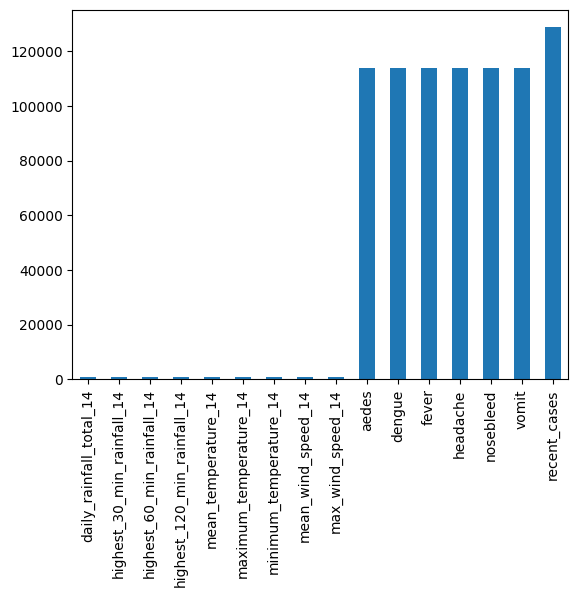

In [5]:
# Plot count of null value of each column
merged_data.isnull().sum()[merged_data.isnull().sum()>0].plot(kind='bar')

We cannot model if the target 'Y' is missing. So we will remove the null values.

In [6]:
# Remove rows with null value sinc
cases = merged_data.dropna()
cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 28 to 130703
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         2027 non-null   object 
 1   daily_rainfall_total         2027 non-null   float64
 2   highest_30_min_rainfall      2027 non-null   float64
 3   highest_60_min_rainfall      2027 non-null   float64
 4   highest_120_min_rainfall     2027 non-null   float64
 5   mean_temperature             2027 non-null   float64
 6   maximum_temperature          2027 non-null   float64
 7   minimum_temperature          2027 non-null   float64
 8   mean_wind_speed              2027 non-null   float64
 9   max_wind_speed               2027 non-null   float64
 10  year                         2027 non-null   int64  
 11  region                       2027 non-null   object 
 12  daily_rainfall_total_14      2027 non-null   float64
 13  highest_30_min_

In [7]:
cases.head()

date  daily_rainfall_total  highest_30_min_rainfall  \
28   2017-01-29                   0.0                      0.0   
35   2017-02-05                   0.0                      0.0   
91   2017-04-02                   0.0                      0.0   
98   2017-04-09                   0.0                      0.0   
105  2017-04-16                   0.2                      0.2   

     highest_60_min_rainfall  highest_120_min_rainfall  mean_temperature  \
28                       0.0                       0.0              26.3   
35                       0.0                       0.0              27.3   
91                       0.0                       0.0              27.4   
98                       0.0                       0.0              27.6   
105                      0.2                       0.2              28.1   

     maximum_temperature  minimum_temperature  mean_wind_speed  \
28                  28.3                 24.5             10.4   
35                  32.6                 24.9              9.7   
91                  31.6                 25.0              8.3   
98                  34.5                 24.9              5.8   
105                 34.5                 25.3              6.1   

     max_wind_speed  year     region  daily_rainfall_total_14  \
28             30.6  2017  Admiralty                15.185714   
35             27.4  2017  Admiralty                10.785714   
91             32.0  2017  Admiralty                 6.585714   
98             26.3  2017  Admiralty                 3.828571   
105            28.8  2017  Admiralty                 4.657143   

     highest_30_min_rainfall_14  highest_60_min_rainfall_14  \
28                     6.385714                    7.785714   
35                     3.857143                    4.542857   
91                     3.657143                    4.700000   
98                     2.814286                    3.128571   
105                    2.814286                    3.857143   

     highest_120_min_rainfall_14  mean_temperature_14  maximum_temperature_14  \
28                      8.800000            26.235714               30.050000   
35                      5.442857            24.378571               29.835714   
91                      5.342857            25.450000               32.014286   
98                      3.342857            27.292857               31.450000   
105                     4.100000            27.785714               31.935714   

     minimum_temperature_14  mean_wind_speed_14  max_wind_speed_14  aedes  \
28                24.000000            9.307143          35.478571   12.0   
35                24.107143            9.764286          36.464286    8.0   
91                24.900000            7.778571          34.092857    5.0   
98                24.785714            7.185714          32.221429   12.0   
105               24.907143            7.071429          32.071429   14.0   

     dengue  fever  headache  nosebleed  vomit  recent_cases  
28     19.0   67.0      63.0       29.0   60.0           1.0  
35     23.0   64.0      59.0        0.0   61.0           1.0  
91     29.0   67.0      87.0        0.0   52.0           3.0  
98     20.0   66.0      56.0       47.0   52.0           1.0  
105    21.0   67.0      74.0       26.0   70.0           2.0

In [8]:
# Sort dataframe by date and set date as index
cases.sort_values(by='date', inplace=True)
cases.set_index('date', inplace=True)

C:\Users\Zeonice\AppData\Local\Temp\ipykernel_12884\1782774059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases.sort_values(by='date', inplace=True)


In [9]:
cases.head()

daily_rainfall_total  highest_30_min_rainfall  \
date                                                        
2016-01-03                   4.8                      1.2   
2016-01-03                   1.4                      0.8   
2016-01-10                   0.0                      0.0   
2016-01-10                   0.0                      0.0   
2016-01-17                  18.4                      8.2   

            highest_60_min_rainfall  highest_120_min_rainfall  \
date                                                            
2016-01-03                      1.8                       2.4   
2016-01-03                      1.2                       1.4   
2016-01-10                      0.0                       0.0   
2016-01-10                      0.0                       0.0   
2016-01-17                     10.6                      15.6   

            mean_temperature  maximum_temperature  minimum_temperature  \
date                                                                     
2016-01-03               0.0                  0.0                  0.0   
2016-01-03               0.0                  0.0                  0.0   
2016-01-10               0.0                  0.0                  0.0   
2016-01-10               0.0                  0.0                  0.0   
2016-01-17               0.0                  0.0                  0.0   

            mean_wind_speed  max_wind_speed  year         region  \
date                                                               
2016-01-03              0.0             0.0  2016       Buangkok   
2016-01-03              0.0             0.0  2016  Kampong Bahru   
2016-01-10              0.0             0.0  2016       Buangkok   
2016-01-10              0.0             0.0  2016  Kampong Bahru   
2016-01-17              0.0             0.0  2016       Buangkok   

            daily_rainfall_total_14  highest_30_min_rainfall_14  \
date                                                              
2016-01-03                 8.642857                    4.071429   
2016-01-03                 3.957143                    2.057143   
2016-01-10                 5.271429                    2.142857   
2016-01-10                 4.614286                    2.742857   
2016-01-17                 2.885714                    1.642857   

            highest_60_min_rainfall_14  highest_120_min_rainfall_14  \
date                                                                  
2016-01-03                    5.642857                     6.828571   
2016-01-03                    2.485714                     3.214286   
2016-01-10                    2.914286                     3.700000   
2016-01-10                    3.085714                     3.900000   
2016-01-17                    2.242857                     2.671429   

            mean_temperature_14  maximum_temperature_14  \
date                                                      
2016-01-03                  0.0                     0.0   
2016-01-03                  0.0                     0.0   
2016-01-10                  0.0                     0.0   
2016-01-10                  0.0                     0.0   
2016-01-17                  0.0                     0.0   

            minimum_temperature_14  mean_wind_speed_14  max_wind_speed_14  \
date                                                                        
2016-01-03                     0.0                 0.0                0.0   
2016-01-03                     0.0                 0.0                0.0   
2016-01-10                     0.0                 0.0                0.0   
2016-01-10                     0.0                 0.0                0.0   
2016-01-17                     0.0                 0.0                0.0   

            aedes  dengue  fever  headache  nosebleed  vomit  recent_cases  
date                                                                        
2016-01-03    0.0    78.0   75.0      81.0        0.0   

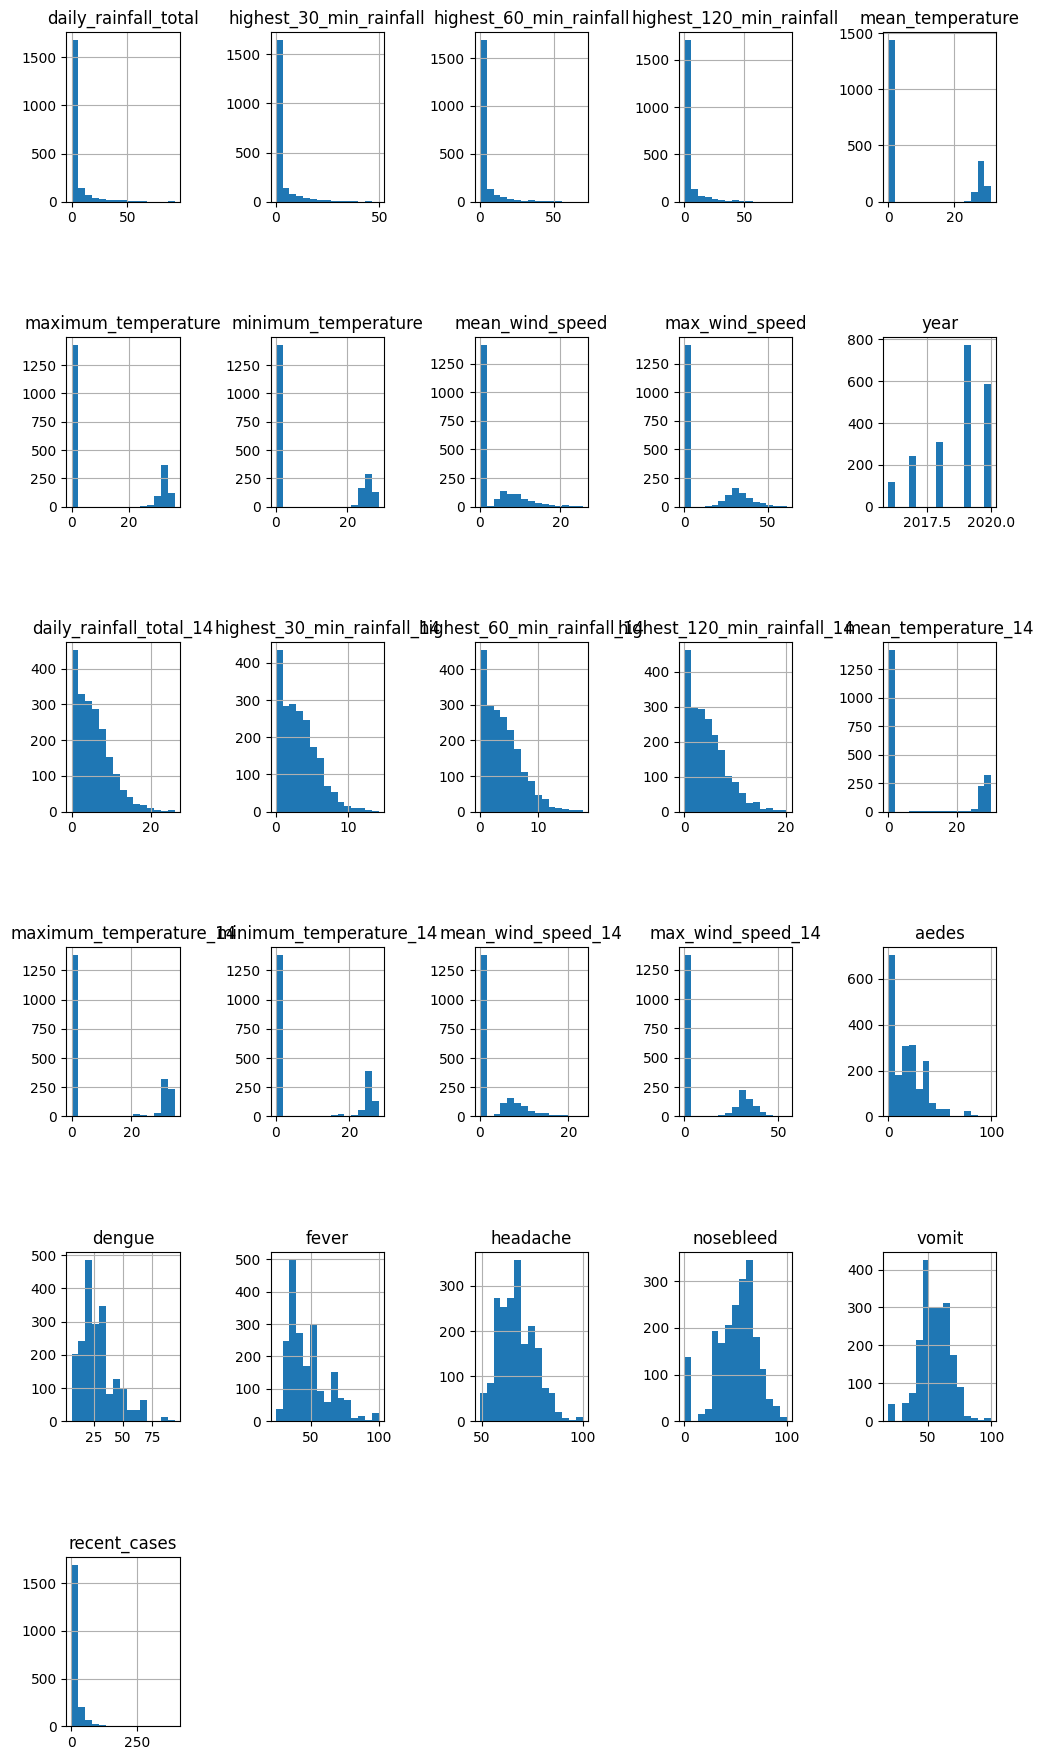

In [10]:
# Plot histogram of numeric variables
cases_numeric = cases.select_dtypes('number')
cases_numeric.hist(bins=15, figsize=(12,22))
plt.subplots_adjust(hspace=0.8, wspace=0.8);

There are many rows without temperature and wind speed reading. It could be due to the sensor is not available in that particular area.

In [11]:
# The highest recent cases
cases[cases['recent_cases'] ==cases['recent_cases'].max()]

daily_rainfall_total  highest_30_min_rainfall  \
date                                                        
2020-08-09                   0.0                      0.0   

            highest_60_min_rainfall  highest_120_min_rainfall  \
date                                                            
2020-08-09                      0.0                       0.0   

            mean_temperature  maximum_temperature  minimum_temperature  \
date                                                                     
2020-08-09              30.3                 33.8                 28.5   

            mean_wind_speed  max_wind_speed  year    region  \
date                                                          
2020-08-09              9.9            29.4  2020  Tai Seng   

            daily_rainfall_total_14  highest_30_min_rainfall_14  \
date                                                              
2020-08-09                      3.8                    1.757143   

            highest_60_min_rainfall_14  highest_120_min_rainfall_14  \
date                                                                  
2020-08-09                    1.928571                     2.071429   

            mean_temperature_14  maximum_temperature_14  \
date                                                      
2020-08-09            29.042857               31.807143   

            minimum_temperature_14  mean_wind_speed_14  max_wind_speed_14  \
date                                                                        
2020-08-09               26.714286           10.007143               31.9   

            aedes  dengue  fever  headache  nosebleed  vomit  recent_cases  
date                                                                        
2020-08-09   36.0    67.0   33.0      64.0       63.0   59.0         395.0

The highest recent case happended at Tai Seng on 2020 Aug 9th. There is no rainfall on that particular day but there was a rain in the past 14 days from that date.

In [12]:
# The highest daily rainfall
cases[cases['daily_rainfall_total'] ==cases['daily_rainfall_total'].max()]

daily_rainfall_total  highest_30_min_rainfall  \
date                                                        
2019-10-27                  92.2                     49.8   

            highest_60_min_rainfall  highest_120_min_rainfall  \
date                                                            
2019-10-27                     69.8                      85.6   

            mean_temperature  maximum_temperature  minimum_temperature  \
date                                                                     
2019-10-27              27.2                 32.8                 23.1   

            mean_wind_speed  max_wind_speed  year  region  \
date                                                        
2019-10-27              6.1            36.4  2019  Changi   

            daily_rainfall_total_14  highest_30_min_rainfall_14  \
date                                                              
2019-10-27                      9.6                    5.142857   

            highest_60_min_rainfall_14  highest_120_min_rainfall_14  \
date                                                                  
2019-10-27                    6.657143                     7.842857   

            mean_temperature_14  maximum_temperature_14  \
date                                                      
2019-10-27            28.321429                   32.75   

            minimum_temperature_14  mean_wind_speed_14  max_wind_speed_14  \
date                                                                        
2019-10-27               25.607143            7.535714          34.307143   

            aedes  dengue  fever  headache  nosebleed  vomit  recent_cases  
date                                                                        
2019-10-27   30.0    21.0   37.0      71.0       75.0   74.0           2.0

The highest rainfall happened at Changi on 2019 Oct 27th total rainfall at 92.2mm.

In [13]:
# The higheat mean temperature
cases[cases['mean_temperature'] ==cases['mean_temperature'].max()]

daily_rainfall_total  highest_30_min_rainfall  \
date                                                        
2020-04-19                   0.0                      0.0   

            highest_60_min_rainfall  highest_120_min_rainfall  \
date                                                            
2020-04-19                      0.0                       0.0   

            mean_temperature  maximum_temperature  minimum_temperature  \
date                                                                     
2020-04-19              31.2                 35.7                 27.4   

            mean_wind_speed  max_wind_speed  year      region  \
date                                                            
2020-04-19              7.9            35.2  2020  Paya Lebar   

            daily_rainfall_total_14  highest_30_min_rainfall_14  \
date                                                              
2020-04-19                 3.278571                         0.0   

            highest_60_min_rainfall_14  highest_120_min_rainfall_14  \
date                                                                  
2020-04-19                         0.0                          0.0   

            mean_temperature_14  maximum_temperature_14  \
date                                                      
2020-04-19            29.842857               34.535714   

            minimum_temperature_14  mean_wind_speed_14  max_wind_speed_14  \
date                                                                        
2020-04-19               26.214286            7.885714          31.614286   

            aedes  dengue  fever  headache  nosebleed  vomit  recent_cases  
date                                                                        
2020-04-19    0.0    28.0   44.0      72.0       40.0   44.0           3.0

The hottest region is Paya Lebar on 2020 April 19th.

In [14]:
# Top 10 region with highest dengue cases
cases.groupby('region')['recent_cases'].sum().sort_values(ascending=False).head(10)

region
Chai Chee        4793.0
Ang Mo Kio       3341.0
Tai Seng         2859.0
Serangoon        2730.0
Bukit Panjang    2127.0
Admiralty        1837.0
Toa Payoh        1804.0
Jurong (West)    1616.0
Simei            1229.0
Yishun           1154.0
Name: recent_cases, dtype: float64

Chai Chee had the highest count of dengue cases.

We will take a lot at the overall data

In [15]:
# Retrieve only numerical data.
cases_numeric = cases_numeric.reset_index()
cases_numeric.drop(columns='date', inplace=True)

In [16]:
# Mask of paramteres.
temp = ['mean_temperature','maximum_temperature','minimum_temperature']
windspeed = ['mean_wind_speed','max_wind_speed']
rainfall = ['daily_rainfall_total','highest_30_min_rainfall','highest_60_min_rainfall', 'highest_120_min_rainfall']
temp_14 = ['mean_temperature_14','maximum_temperature_14','minimum_temperature_14']
windspeed_14 = ['mean_wind_speed_14','max_wind_speed_14']
rainfall_14 = ['daily_rainfall_total_14','highest_30_min_rainfall_14','highest_60_min_rainfall_14', 'highest_120_min_rainfall_14']

# Remove rolling mean and retain the original data.
cases_numeric2 = cases_numeric.drop(columns=temp_14+windspeed_14+rainfall_14)

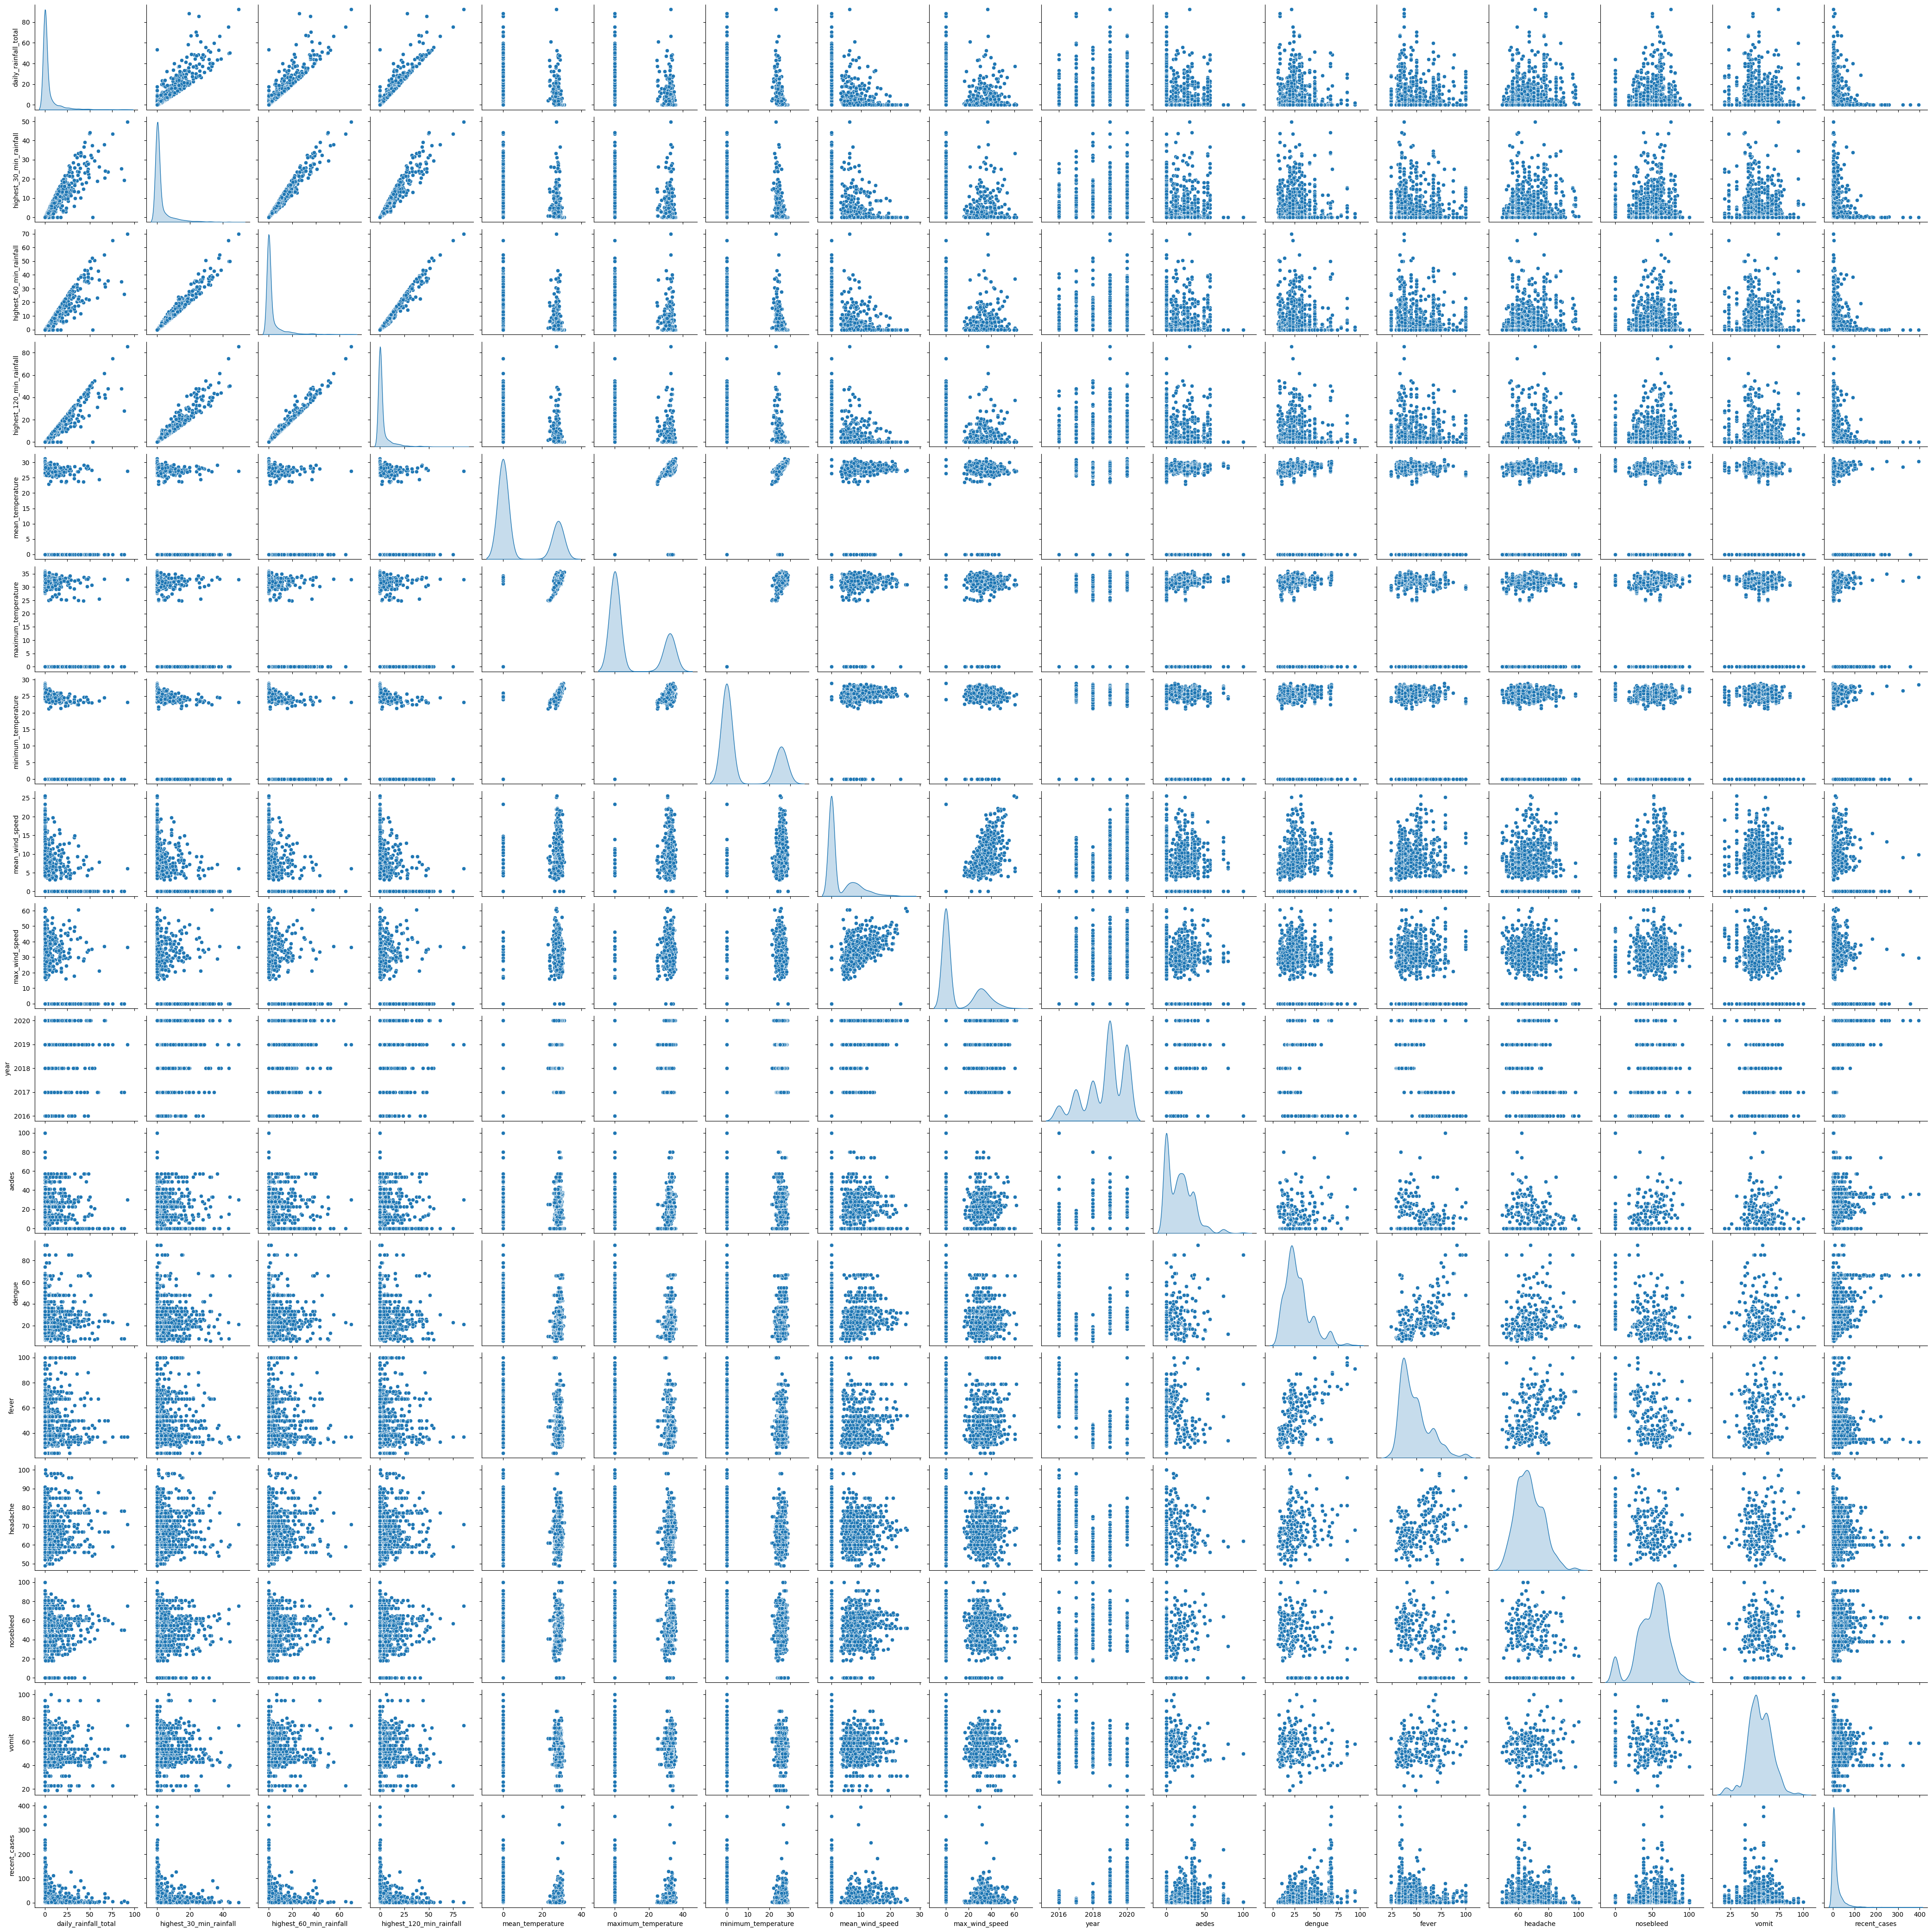

In [17]:
# Pairplot of data.
sns.pairplot(data=cases_numeric2, diag_kind='kde')


Reecnt cases data is right skewed. Rainfall data are correlated to each other. There seems to be more dengue cases in 2020. There are a lot of missing temperature and wind speed data.

In [18]:
def hm(df):
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(12, 12))
        ax = sns.heatmap(df, mask=mask, vmax=.9, square=True,annot=True, annot_kws={"size":7})

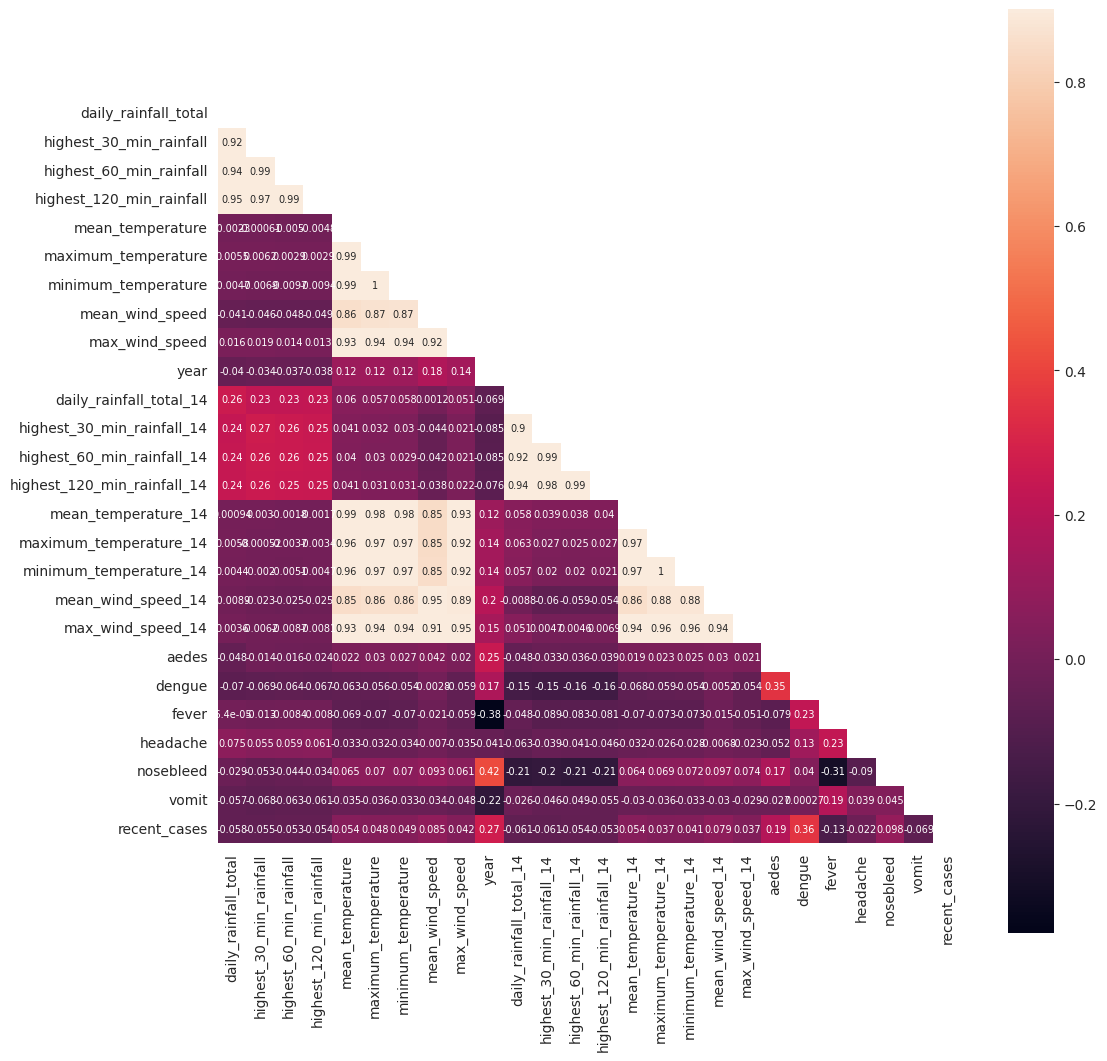

In [19]:
casescorr = cases_numeric.corr()
casescorr = hm(casescorr)

In [20]:
casescorr = cases_numeric.corr()
casescorr['recent_cases'].sort_values(ascending=False)

recent_cases                   1.000000
dengue                         0.356120
year                           0.270512
aedes                          0.188150
nosebleed                      0.097738
mean_wind_speed                0.084672
mean_wind_speed_14             0.078685
mean_temperature               0.054445
mean_temperature_14            0.054175
minimum_temperature            0.049140
maximum_temperature            0.048162
max_wind_speed                 0.041658
minimum_temperature_14         0.041120
max_wind_speed_14              0.037422
maximum_temperature_14         0.037092
headache                      -0.021584
highest_120_min_rainfall_14   -0.052652
highest_60_min_rainfall       -0.052864
highest_60_min_rainfall_14    -0.053778
highest_120_min_rainfall      -0.053817
highest_30_min_rainfall       -0.055046
daily_rainfall_total          -0.057925
highest_30_min_rainfall_14    -0.061246
daily_rainfall_total_14       -0.061351
vomit                         -0.069131


There isn't any parameter that has high correlation to the recent cases.

In [21]:
# Retrieve Chai Chee data from cases
chaichee = cases[cases['region'] == 'Chai Chee']

# Display Chai Chee data
chaichee.head()

daily_rainfall_total  highest_30_min_rainfall  \
date                                                        
2017-02-12                   5.2                      2.0   
2017-02-19                   0.0                      0.0   
2017-02-26                   0.0                      0.0   
2017-04-02                   2.4                      2.2   
2017-04-09                   0.2                      0.2   

            highest_60_min_rainfall  highest_120_min_rainfall  \
date                                                            
2017-02-12                      2.0                       3.6   
2017-02-19                      0.0                       0.0   
2017-02-26                      0.0                       0.0   
2017-04-02                      2.2                       2.2   
2017-04-09                      0.2                       0.2   

            mean_temperature  maximum_temperature  minimum_temperature  \
date                                                                     
2017-02-12               0.0                  0.0                  0.0   
2017-02-19               0.0                  0.0                  0.0   
2017-02-26               0.0                  0.0                  0.0   
2017-04-02               0.0                  0.0                  0.0   
2017-04-09               0.0                  0.0                  0.0   

            mean_wind_speed  max_wind_speed  year     region  \
date                                                           
2017-02-12              0.0             0.0  2017  Chai Chee   
2017-02-19              0.0             0.0  2017  Chai Chee   
2017-02-26              0.0             0.0  2017  Chai Chee   
2017-04-02              0.0             0.0  2017  Chai Chee   
2017-04-09              0.0             0.0  2017  Chai Chee   

            daily_rainfall_total_14  highest_30_min_rainfall_14  \
date                                                              
2017-02-12                 7.714286                    5.042857   
2017-02-19                 6.114286                    3.600000   
2017-02-26                 5.928571                    2.442857   
2017-04-02                 4.242857                    2.514286   
2017-04-09                 3.728571                    2.157143   

            highest_60_min_rainfall_14  highest_120_min_rainfall_14  \
date                                                                  
2017-02-12                    5.442857                     6.314286   
2017-02-19                    4.157143                     4.471429   
2017-02-26                    3.357143                     4.200000   
2017-04-02                    2.814286                     3.314286   
2017-04-09                    2.500000                     2.914286   

            mean_temperature_14  maximum_temperature_14  \
date                                                      
2017-02-12                  0.0                     0.0   
2017-02-19                  0.0                     0.0   
2017-02-26                  0.0                     0.0   
2017-04-02                  0.0                     0.0   
2017-04-09                  0.0                     0.0   

            minimum_temperature_14  mean_wind_speed_14  max_wind_speed_14  \
date                                                                        
2017-02-12                     0.0                 0.0                0.0   
2017-02-19                     0.0                 0.0                0.0   
2017-02-26                     0.0                 0.0                0.0   
2017-04-02                     0.0                 0.0                0.0   
2017-04-09                     0.0                 0.0                0.0   

            aedes  dengue  fever  headache  nosebleed  vomit  recent_cases  
date                                                                        
2017-02-12    0.0    13.0   71.0      50.0       21.0   56.0           1.0  
2017-02

Temperature and wind speed data is missing from Chai Chee region.

In [22]:
# Retrieve numerical data
chaichee_num = chaichee.select_dtypes('number')
chaichee_num.drop(columns=temp+temp_14+windspeed+windspeed_14, inplace=True)

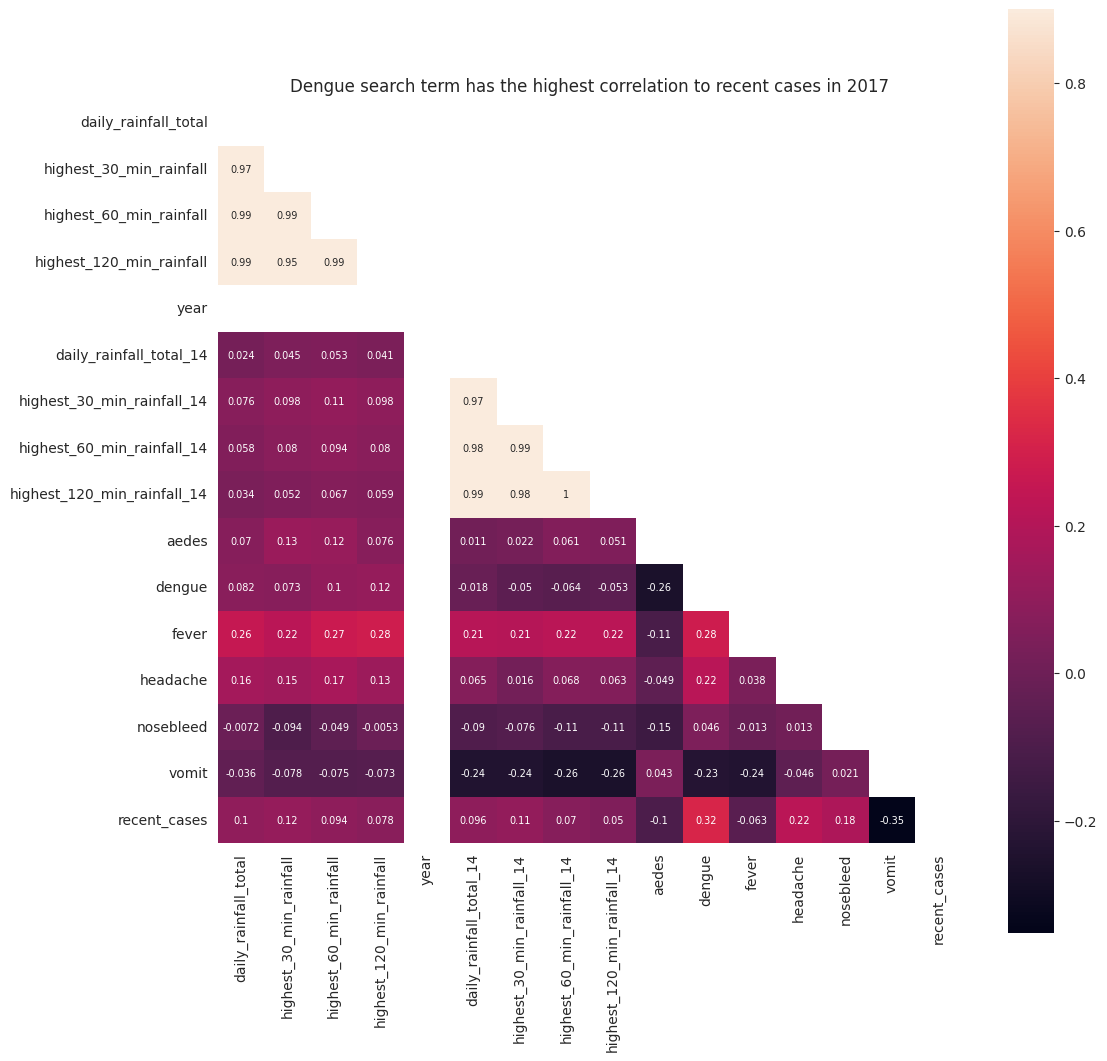

In [23]:
chaichee_num2017 = chaichee_num[chaichee_num['year']==2017]
chaicheecorr17 = chaichee_num2017.corr()
chaicheecorr17 = hm(chaicheecorr17)
plt.title('Dengue search term has the highest correlation to recent cases in 2017');


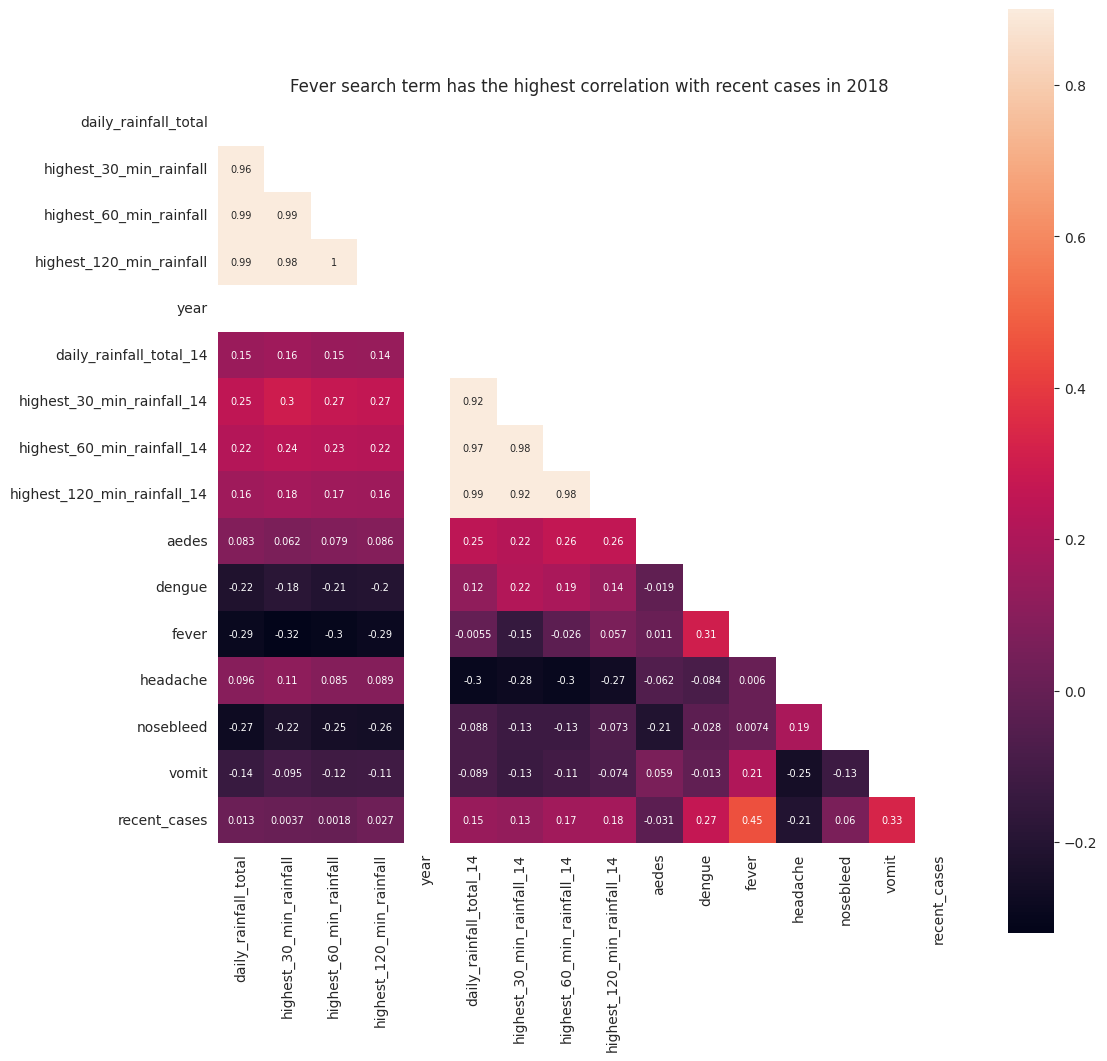

In [24]:
chaichee_num2018= chaichee_num[chaichee_num['year']==2018]
chaicheecorr18 = chaichee_num2018.corr()
chaicheecorr18 = hm(chaicheecorr18)
plt.title('Fever search term has the highest correlation with recent cases in 2018');

To look at some insights with temperature and windspeed, we will try with Ang Mo Kio region.

In [25]:
# Retrieve Ang Mo Kio data from cases
amk = cases[cases['region'] == 'Ang Mo Kio']
amk.head()

daily_rainfall_total  highest_30_min_rainfall  \
date                                                        
2017-01-15                   0.0                      0.0   
2017-01-22                  13.2                     10.6   
2017-01-29                   0.0                      0.0   
2017-04-23                   6.4                      6.0   
2017-04-30                   0.0                      0.0   

            highest_60_min_rainfall  highest_120_min_rainfall  \
date                                                            
2017-01-15                      0.0                       0.0   
2017-01-22                     12.6                      12.6   
2017-01-29                      0.0                       0.0   
2017-04-23                      6.4                       6.4   
2017-04-30                      0.0                       0.0   

            mean_temperature  maximum_temperature  minimum_temperature  \
date                                                                     
2017-01-15              28.2                 32.9                 25.7   
2017-01-22              26.3                 29.5                 24.0   
2017-01-29              26.2                 28.4                 24.5   
2017-04-23              28.2                 31.5                 26.3   
2017-04-30              28.9                 34.8                 25.9   

            mean_wind_speed  max_wind_speed  year      region  \
date                                                            
2017-01-15              5.0            36.4  2017  Ang Mo Kio   
2017-01-22              7.6            40.0  2017  Ang Mo Kio   
2017-01-29              5.8            24.1  2017  Ang Mo Kio   
2017-04-23              4.0            22.3  2017  Ang Mo Kio   
2017-04-30              5.4            27.7  2017  Ang Mo Kio   

            daily_rainfall_total_14  highest_30_min_rainfall_14  \
date                                                              
2017-01-15                 5.200000                    3.585714   
2017-01-22                12.385714                    7.128571   
2017-01-29                14.728571                    6.442857   
2017-04-23                17.000000                    9.757143   
2017-04-30                13.228571                    8.042857   

            highest_60_min_rainfall_14  highest_120_min_rainfall_14  \
date                                                                  
2017-01-15                    4.685714                     5.142857   
2017-01-22                    8.971429                    10.471429   
2017-01-29                    7.914286                     9.828571   
2017-04-23                   13.485714                    14.614286   
2017-04-30                   10.685714                    11.328571   

            mean_temperature_14  maximum_temperature_14  \
date                                                      
2017-01-15            27.928571               32.478571   
2017-01-22            27.400000               32.228571   
2017-01-29            26.300000               30.214286   
2017-04-23            27.800000               32.100000   
2017-04-30            27.778571               32.428571   

            minimum_temperature_14  mean_wind_speed_14  max_wind_speed_14  \
date                                                                        
2017-01-15               25.042857            5.314286          27.471429   
2017-01-22               24.514286            5.371429          31.435714   
2017-01-29               23.935714            5.800000          33.800000   
2017-04-23               24.757143            4.421429          29.142857   
2017-04-30               24.892857            4.450000          29.500000   

            aedes  dengue  fever  headache  nosebleed  vomit  recent_cases  
date                                                                        
2017-01-15    0.0    21.0   67.0      63.0        0.0   59.0           3.0  


In [26]:
amk_num = amk.select_dtypes('number')

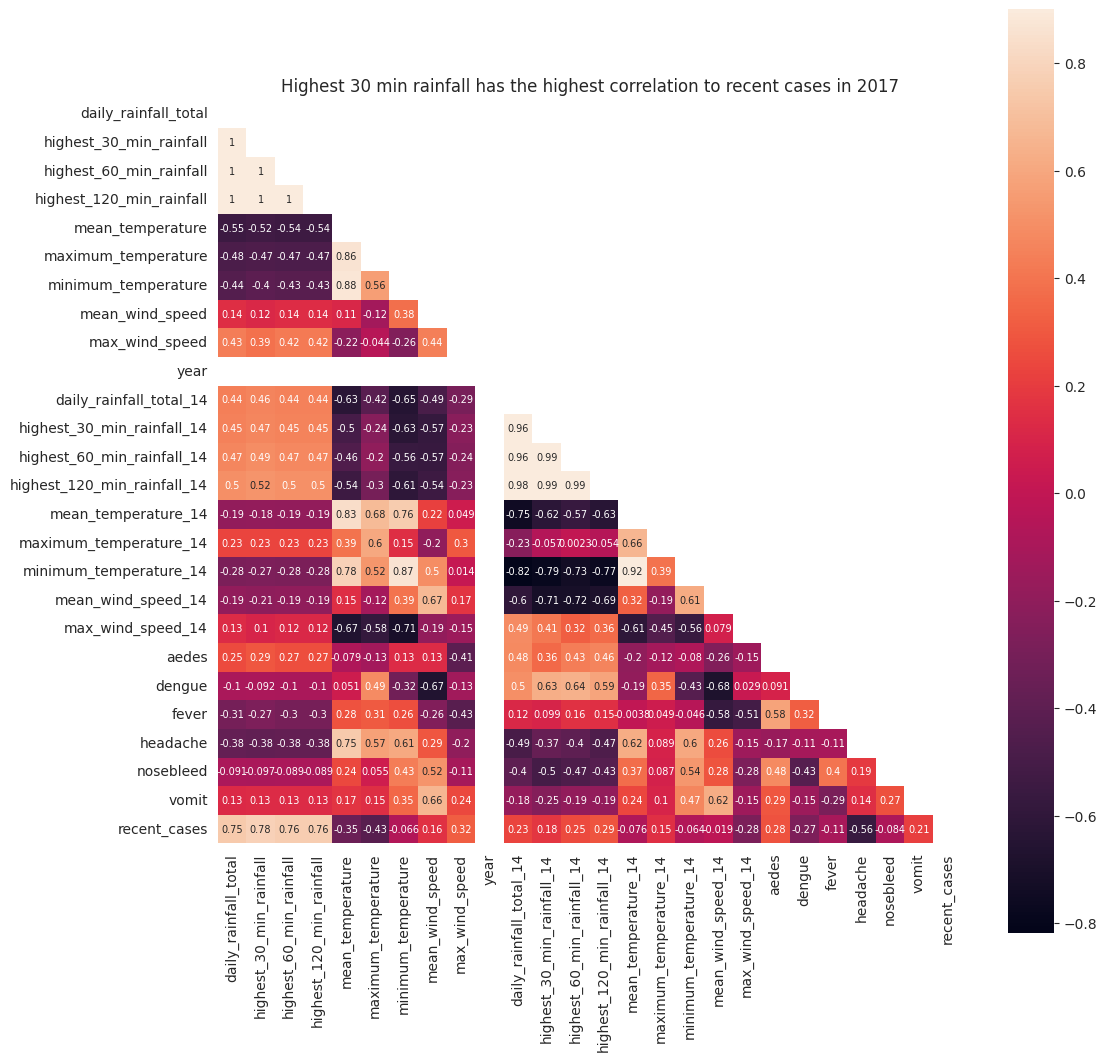

In [27]:
amk_num2017 = amk_num[amk_num['year']==2017]
amkcorr17 = amk_num2017.corr()
amkcorr17 = hm(amkcorr17)
plt.title('Highest 30 min rainfall has the highest correlation to recent cases in 2017');

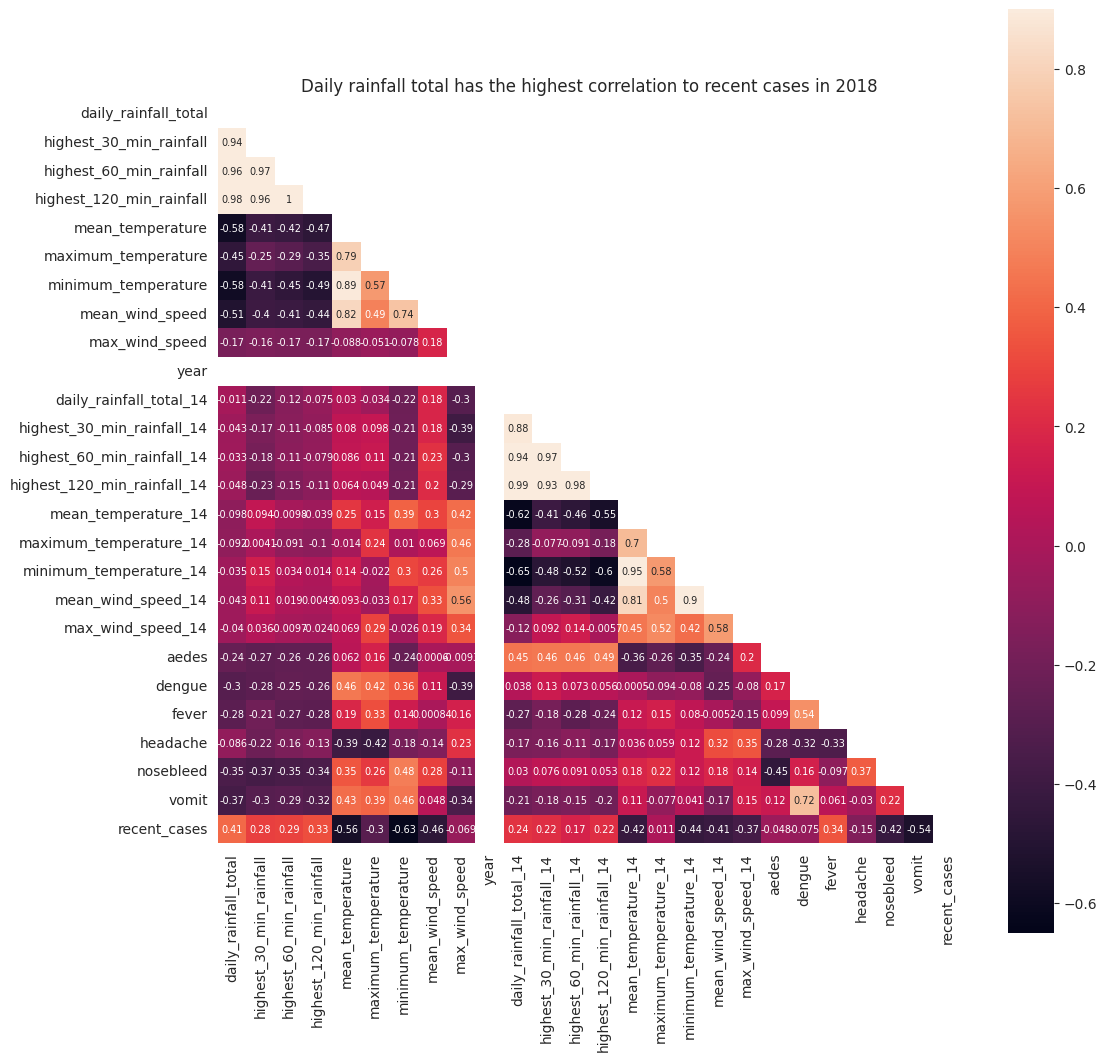

In [28]:
amk_num2018 = amk_num[amk_num['year']==2018]
amkcorr18 = amk_num2018.corr()
amkcorr18 = hm(amkcorr18)
plt.title('Daily rainfall total has the highest correlation to recent cases in 2018');

From both of the Ang Mo Kio heatmap above, we understand that rainfall affects the recent cases while temperature and wind speed has only little correlation to recent cases.

The target or the recent cases of the data is right skewed.

Skweness of recent cases:5.328808842035491


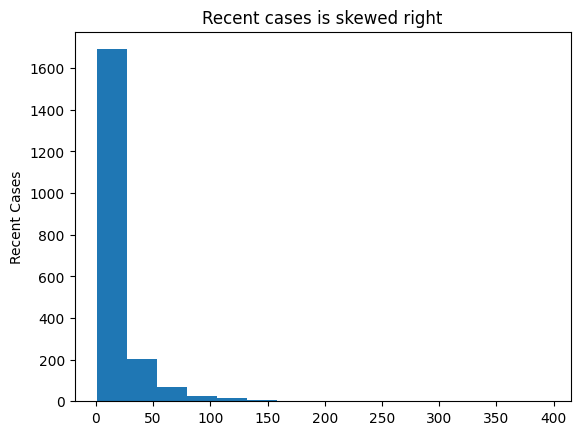

In [29]:
print ('Skweness of recent cases:'+str(cases['recent_cases'].skew()))

plt.hist(cases['recent_cases'], bins=15)
plt.ylabel('Recent Cases')
plt.title('Recent cases is skewed right');

By applying log to the target, we are able to reduce the skewness.

Skweness of recent cases:0.4005230843174329


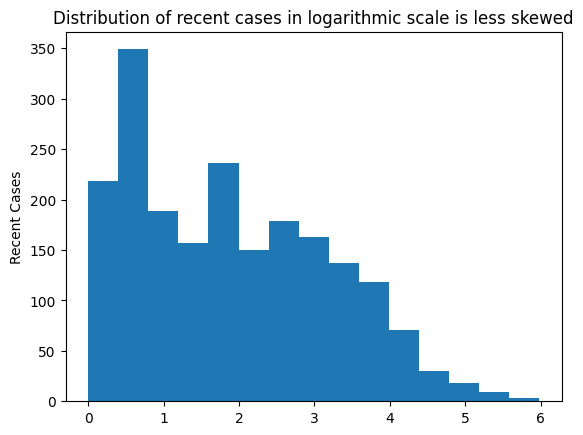

In [30]:
print ('Skweness of recent cases:'+str(np.log(cases['recent_cases']).skew()))

plt.hist(np.log(cases['recent_cases']), bins=15);
plt.ylabel('Recent Cases')
plt.title('Distribution of recent cases in logarithmic scale is less skewed');

C:\Users\Zeonice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


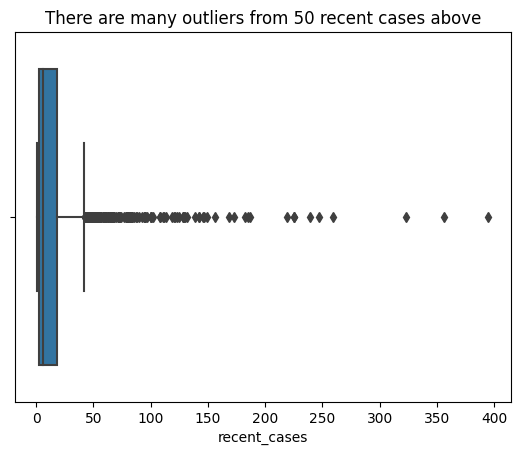

In [31]:
sns.boxplot(cases['recent_cases'])
plt.title('There are many outliers from 50 recent cases above');